# 음성 인식(Speech Recognition)

## Speech To Text(STT)

* STT는 음성을 입력받아 그에 해당하는 구문(문자열)을 얻는 기술
* 딥러닝을 이용한 STT 모델에는 WaveNet 등이 존재
* SpeechRecognition을 이용하면 모델을 학습시키지 않고도 간편하게 구현 가능



### 라이브러리 소개 및 설치



*   음성 인식 기술은 음성 데이터가 대부분 크고, 관련 기술 코드도 상당히 길어 구현이 힘듬
*   SpeechRecognition을 사용하면 이러한 과정 없이 음성 인식 기술을 이용할 수 있음



In [ ]:
!pip install SpeechRecognition

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 44.1 MB/s eta 0:00:00


### Recognizer



*   SpeechRecognition 라이브러리의 기능을 이용하기 위해선 Recognizer 객체를 생성



In [ ]:
import speech_recognition as sr

r = sr.Recognizer()

* 여러 기업에서 제공하는 음성 인식 기술 사용 가능
  + `recognize_google()` - Google Web Speech API
  + `recognize_google_cloud()` - Google Cloud Speech
  + `recognize_bing()` - Microsoft Bing Speech
  + `recognize_houndify()` - SoundHound Houndify
  + `recognize_ibm()` - IBM Speech to Text
  + `recognize_wit()` - Wit.ai
  + `recognize_sphinx()` - CMU Sphinx (Sphinx는 오프라인으로 동작하며, 나머지 모든 함수는 인터넷 연결이 되어야만 사용 가능)



## 음성 데이터

* SpeechRecognition 지원 파일 형식
  * WAV
  * AIFF
  * AIFF-C
  * FLAC

* OpenSpeechRepository에서 제공하는 Harvard Sentence 데이터 사용
  + http://www.voiptroubleshooter.com/open_speech/
* SpeechRecognition을 사용하기 위해 데이터를 AudioFile 객체로 변환



In [3]:
# 파일 경로 지정
file_path = '/content/sample_data/OSR_us_000_0010_8k.wav'

# 파일이 잘 불러와졌는지 확인
with open(file_path, 'rb') as file:
    print("파일이 성공적으로 로드되었습니다.")


파일이 성공적으로 로드되었습니다.


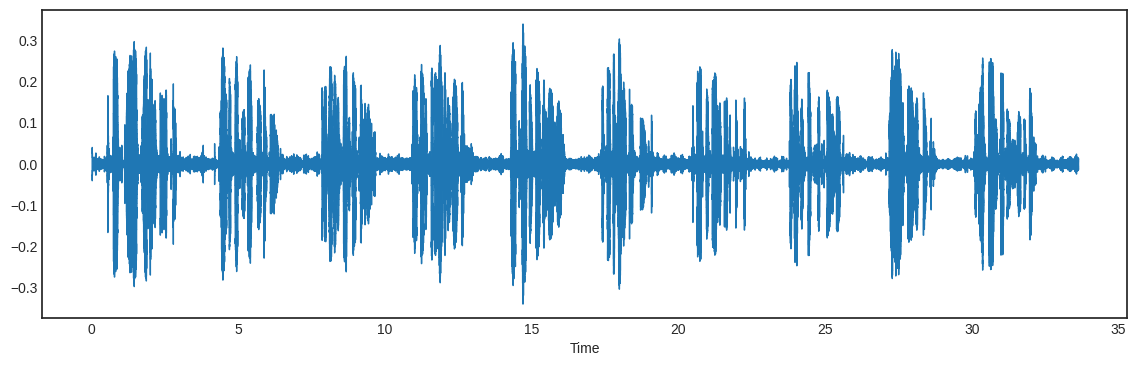

In [8]:
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-white')

fig = plt.figure(figsize=(14,4))
american_wav, rate = librosa.core.load(file_path)
# Pass the audio data (american_wav) instead of the file path
librosa.display.waveshow(american_wav, sr=rate)

ipd.Audio(file_path, rate=rate)

## 음성 인식

### 영어(English)




* SpeechRecognition이 기본으로 지원하는 언어
* STT를 구현하기 위해선 먼저 recognizer의 record 함수를 이용해 데이터를 입력
* recognize를 이용해 각 기업에서 제공하는 api를 통해 음성에 해당하는 구문을 얻을 수 있음



In [16]:
import speech_recognition as sr

# Create a Recognizer object
r = sr.Recognizer()

# Now you can use sr and r
american_audio = sr.AudioFile(file_path)

with american_audio as source:
  audio = r.record(source)

r.recognize_google(audio_data=audio, language='en-US')

'the birds canoe slid on the smooth planks glue the sheet to the dark blue background it is easy to tell the depth of a well these days a chicken leg is a rare dish rice is often served in round Bowls the juice of lemons makes fine punch the box was thrown beside the park truck the Hogs are fed chopped corn and garbage 4 hours of study work face does a large size and stockings is hard to sell'

* record 함수를 사용할 때 duration을 지정하면 시작 지점에서 원하는 초만큼의 데이터만 입력 가능
* 지정된 음성에 대한 문자열만 얻는 것을 볼 수 있음





In [17]:
with american_audio as source:
  audio = r.record(source, duration=4)

r.recognize_google(audio_data=audio, language='en-US')

'the Birch canoe slid on the smooth planks'

* offset을 지정하면 offset에 해당하는 초부터 데이터를 입력
* duration과 offset을 이용해 원하는 지점, 범위만큼 데이터 입력 가능
*   단, 앞뒤 데이터를 고려하는 특성 상 데이터를 일부만 입력하면 상대적으로 성능이 떨어질 수 있음
*   결과를 보면 같은 지점인데도 아까와는 다른 결과가 나오는 것을 볼 수 있음


In [18]:
with american_audio as source:
  audio = r.record(source, offset=2)

r.recognize_google(audio_data=audio, language='en-US')

'play lid on the smooth planks glue the sheet to the dark blue background it is easy to tell the depth of a well these days a chicken leg is a rare dish rice is often served in round Bowls the juice of lemons makes fine punch the box was thrown beside the park truck the dogs are fed chopped corn and garbage 4 hours of study work face does a large size and stockings is hard to sell'

In [19]:
with american_audio as source:
  audio = r.record(source, offset=2, duration=4)

r.recognize_google(audio_data=audio, language='en-US')

'play slid on the smooth planks glue the sheets'

### 중국어(Chinese - Mandarim)



*  SpeechRecognition은 영어 외에도 중국어, 한국어 등 다양한 언어를 입력할 수 있음
*  단 recognize를 사용할 때 language 인자로 해당 언어에 대한 정보를 명시해주어야 함



In [21]:
# 파일 경로 지정
file_path_cn = '/content/sample_data/OSR_cn_000_0072_8k.wav'

# 파일이 잘 불러와졌는지 확인
with open(file_path_cn, 'rb') as file:
    print("파일이 성공적으로 로드되었습니다.")

파일이 성공적으로 로드되었습니다.


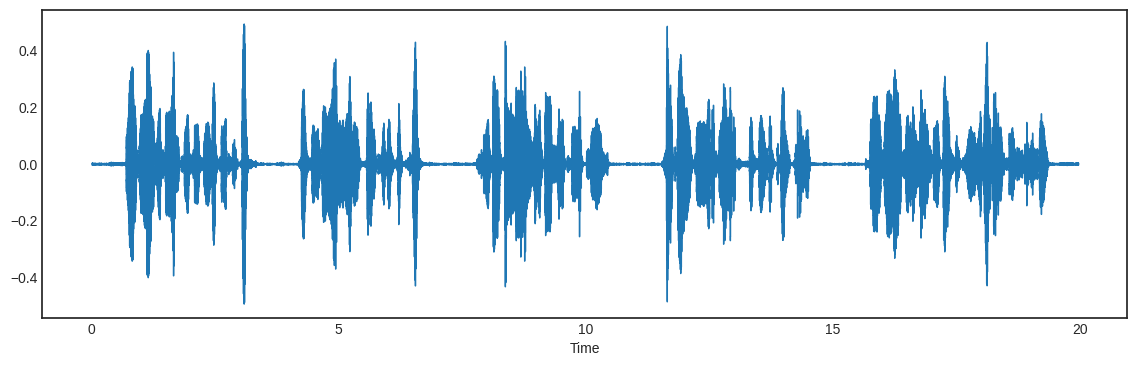

In [24]:
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-white')

fig = plt.figure(figsize=(14,4))
chines_wav, rate = librosa.core.load(file_path_cn)

librosa.display.waveshow(chines_wav, sr=rate)

ipd.Audio(file_path_cn, rate=rate)

In [28]:
import speech_recognition as sr

# Create a Recognizer object
r = sr.Recognizer()

# Now you can use sr and r
chinese_audio = sr.AudioFile(file_path_cn)

with chinese_audio as source:
  audio = r.record(source)

r.recognize_google(audio_data=audio, language='zh-CN')

'院子門口不遠處就是一個地鐵藏這是一個美麗而神奇的景象樹上長滿了又大又甜的桃子海豚鯨魚的表演是很好看的節目郵局門前的人行道上有一個藍色的油箱'

### 프랑스어(French)

In [25]:
# 파일 경로 지정
file_path_fr = '/content/sample_data/OSR_fr_000_0041_8k.wav'

# 파일이 잘 불러와졌는지 확인
with open(file_path_fr, 'rb') as file:
    print("파일이 성공적으로 로드되었습니다.")

파일이 성공적으로 로드되었습니다.


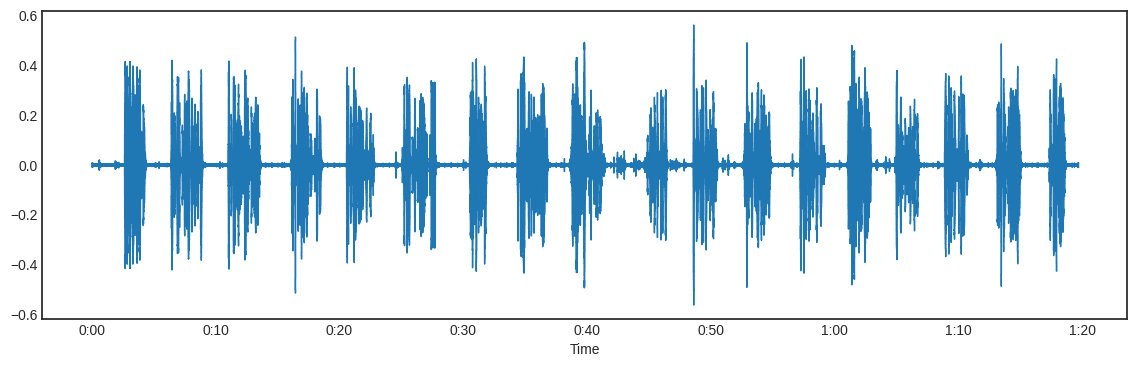

In [26]:
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-white')

fig = plt.figure(figsize=(14,4))
french_wav, rate = librosa.core.load(file_path_fr)

librosa.display.waveshow(french_wav, sr=rate)

ipd.Audio(file_path_fr, rate=rate)

In [29]:
import speech_recognition as sr

# Create a Recognizer object
r = sr.Recognizer()

# Now you can use sr and r
french_audio = sr.AudioFile(file_path_fr)

with french_audio as source:
  audio = r.record(source)

r.recognize_google(audio_data=audio, language='fr-FR')

"pourrais-je avoir un verre d'eau la SNCF assurera un train sur 3 les couples de l'immense palais s'écroulèrent on apercevait la voie blanche du Petit Bateau ils sont ni douleur ni couscous soit toujours plus petit que la mère tu gagneras les langues vont bon train le soleil joue à cache-cache avec les nuages l'animal le regarde avec reconnaissance ils sont juste en face sur le toit parfois une questionne sur ma vie je garde un souvenir ému de nuit la brebis est dans sa litière sèche c'est véritablement le nerf de la guerre d'habitude j'ai des outils pour faire ça nous nous sentions tristes et très abattu sa discrétion mais ton a énormément comprenez-vous ma joie"

### 한국어(Korean)

* https://www.dropbox.com/s/fp8p8dspu74eq7x/korean.wav

In [31]:
!wget https://www.dropbox.com/s/fp8p8dspu74eq7x/korean.wav


--2024-11-04 12:52:32--  https://www.dropbox.com/s/fp8p8dspu74eq7x/korean.wav
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/pniplt1knt8eci6ft0stq/korean.wav?rlkey=wouavzo8v37v2a545u2ud2i73 [following]
--2024-11-04 12:52:32--  https://www.dropbox.com/scl/fi/pniplt1knt8eci6ft0stq/korean.wav?rlkey=wouavzo8v37v2a545u2ud2i73
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc883e763cdc18d20db0524ec607.dl.dropboxusercontent.com/cd/0/inline/Cdtt0LEfC3xf5Lh0LoMRuURIOLCKuOk3lOvtLJEiVhK1FrUSg9lrRJ5015a-3rav344T4w9APBQ9lNhPiBX0CyTjXeNzTJ51ZHl7_gPtQuwj2nB0VdvvS2esDsxjTcr5RiQ/file# [following]
--2024-11-04 12:52:34--  https://uc883e763cdc18d20db0524ec607.dl.dropboxusercontent.com/cd/0/inline/Cdtt0LEfC3xf5Lh0LoMRuURIO

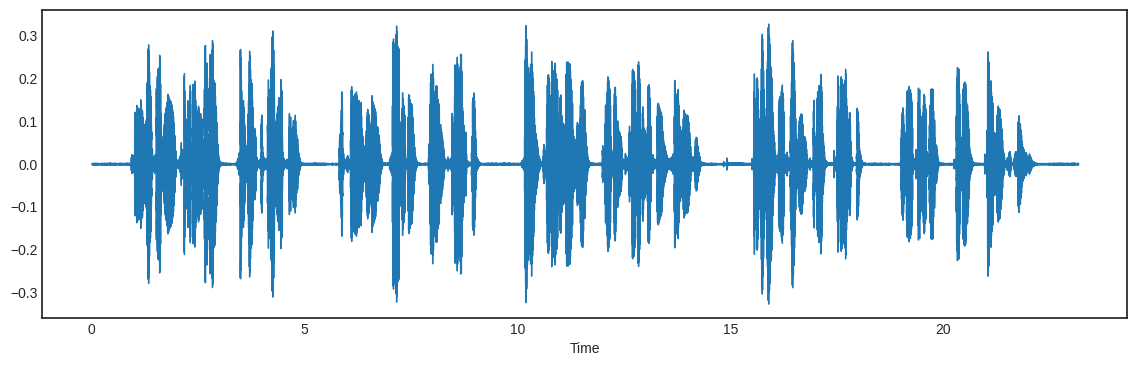

In [32]:
fig = plt.figure(figsize=(14,4))
korean_wav, rate = librosa.core.load('korean.wav')

librosa.display.waveshow(korean_wav, sr=rate)

ipd.Audio(korean_wav,rate=rate)

In [33]:
korean_audio = sr.AudioFile('korean.wav')

with korean_audio as source:
  audio = r.record(source)

r.recognize_google(audio_data=audio, language='ko-KR')

'죽는 날까지 하늘을 우러러 한 점 부끄럼이 없기를 잎새에이는 바람에도 나는 괴로워했다 별은 노래하는 마음으로 모든 죽어가는 것을 사랑해야지 그리고 나한테 주어진 길을 걸어야겠다 오늘 밤에도 별이 바람에 스치운다'